In [55]:
import pandas as pd
import numpy as np 
from keras.layers.core import Dense,Activation,Dropout
from keras.layers.recurrent import LSTM
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os

os.listdir()
os.chdir('data')

from IPython.display import display

pd.options.display.max_columns = 100


FileNotFoundError: [Errno 2] No such file or directory: 'data'

In [2]:
datafest = pd.read_csv('datafest2018-Updated-April12.csv')
prices = pd.read_csv('all_stocks_5yr.csv')
fundamentals = pd.read_csv('fundamentals.csv')
securities = pd.read_csv('securities.csv')
# reddit_news = pd.read_csv("RedditNews.csv")

In [54]:
len(datafest.normTitle.unique())
prices.tail()

{'commit_hash': 'ca5443062',
 'commit_source': 'installation',
 'default_encoding': 'UTF-8',
 'ipython_path': '/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython',
 'ipython_version': '6.2.1',
 'os_name': 'posix',
 'platform': 'Darwin-17.5.0-x86_64-i386-64bit',
 'sys_executable': '/Library/Frameworks/Python.framework/Versions/3.6/bin/python3',
 'sys_platform': 'darwin',
 'sys_version': '3.6.4 (v3.6.4:d48ecebad5, Dec 18 2017, 21:07:28) \n'
                '[GCC 4.2.1 (Apple Inc. build 5666) (dot 3)]'}


,date,open,high,low,close,volume,Name,change,vol
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS,0.012754,2.320794e+08
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS,-0.009674,1.992585e+08
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS,-0.036665,2.186867e+08
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS,0.007286,3.608051e+08
619039,2018-02-07,72.70,75.00,72.69,73.86,4534912,ZTS,0.015956,3.349486e+08


In [4]:
prices['change'] = (prices['close']-prices['open'])/prices['open']
prices['date'] = pd.to_datetime(prices['date'])
prices['vol'] = prices['close'] * prices['volume']
date_mask_stock = (prices['date'] >= '2016-11-01') & (prices['date'] <= '2017-11-30')
prices_adjusted = prices.loc[date_mask_stock]
prices_adjusted.tail()

,date,open,high,low,close,volume,Name,change,vol
618989,2017-11-24,71.17,71.42,70.93,71.29,1200253,ZTS,0.001686,8.556604e+07
618990,2017-11-27,71.49,71.80,71.22,71.54,1997531,ZTS,0.000699,1.429034e+08
618991,2017-11-28,71.59,71.63,71.26,71.39,2610441,ZTS,-0.002794,1.863594e+08
618992,2017-11-29,71.99,72.10,71.28,71.61,1618690,ZTS,-0.005279,1.159144e+08
618993,2017-11-30,71.84,72.71,71.84,72.29,2602127,ZTS,0.006264,1.881078e+08


In [5]:
stock_vol = ['date','Name','vol']
stock_data = prices_adjusted[stock_vol].set_index('date')
stock_data = stock_data.groupby([pd.Grouper(freq='M'), 'Name']).sum()
stock_data.reset_index(['Name','date'],inplace=True)

In [6]:
stock_data_wide = stock_data.pivot(index='Name', 
                                  columns='date', 
                                  values='vol')
stock_data_wide.head() 

date,2016-11-30 00:00:00,2016-12-31 00:00:00,2017-01-31 00:00:00,2017-02-28 00:00:00,2017-03-31 00:00:00,2017-04-30 00:00:00,2017-05-31 00:00:00,2017-06-30 00:00:00,2017-07-31 00:00:00,2017-08-31 00:00:00,2017-09-30 00:00:00,2017-10-31 00:00:00,2017-11-30 00:00:00
Name,,,,,,,,,,,,,
A,2.399403e+09,1.550574e+09,2.171564e+09,1.984559e+09,2.152663e+09,1.734384e+09,2.932022e+09,2.560352e+09,1.951266e+09,2.661509e+09,1.835397e+09,2.087473e+09,2.872072e+09
AAL,6.481850e+09,5.872229e+09,6.907887e+09,5.070157e+09,7.632871e+09,5.959659e+09,5.999397e+09,6.587511e+09,5.799168e+09,5.751052e+09,6.025603e+09,5.984057e+09,3.501396e+09
AAP,4.997559e+09,2.657138e+09,2.943253e+09,4.438535e+09,3.459496e+09,2.807702e+09,5.079986e+09,4.512578e+09,4.148781e+09,6.174786e+09,3.538678e+09,3.775976e+09,4.220921e+09
AAPL,7.929405e+10,6.947346e+10,6.741892e+10,7.634232e+10,7.907886e+10,5.334657e+10,9.928964e+10,1.007900e+11,6.258099e+10,1.029939e+11,1.070567e+11,8.011298e+10,1.033347e+11
ABBV,1.177476e+10,9.176709e+09,9.655630e+09,7.771697e+09,9.295629e+09,6.735718e+09,8.223911e+09,9.257098e+09,7.220344e+09,6.963829e+09,1.648520e+10,1.272944e+10,9.535711e+09


In [7]:
securities.head()

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877


In [8]:
# print(fundamentals.shape)
# print(securities.shape)
print('Number of co. in securities: ',len(securities['Ticker symbol'].unique()))
print('Number of co. in fundamentals: ',len(fundamentals['Ticker Symbol'].unique()))

Number of co. in securities:  505
Number of co. in fundamentals:  448


In [9]:
fundamentals.set_index('Ticker Symbol').join(securities.set_index('Ticker symbol'))
print(fundamentals.shape)

(1781, 79)


In [34]:
joined_stock_data = stock_data.set_index('Name').join(securities[['Ticker symbol','GICS Sector','GICS Sub Industry']].set_index('Ticker symbol'))
joined_stock_data = joined_stock_data.groupby(['date','GICS Sector']).sum().reset_index(['GICS Sector','date'])
joined_stock_data_wide = joined_stock_data.pivot(index='GICS Sector', columns='date', values='vol')
joined_stock_data_wide 

date,2016-11-30 00:00:00,2016-12-31 00:00:00,2017-01-31 00:00:00,2017-02-28 00:00:00,2017-03-31 00:00:00,2017-04-30 00:00:00,2017-05-31 00:00:00,2017-06-30 00:00:00,2017-07-31 00:00:00,2017-08-31 00:00:00,2017-09-30 00:00:00,2017-10-31 00:00:00,2017-11-30 00:00:00
GICS Sector,,,,,,,,,,,,,
Consumer Discretionary,4.739365e+11,3.926044e+11,3.853824e+11,3.881531e+11,4.140204e+11,3.682661e+11,4.673459e+11,4.775151e+11,4.212687e+11,4.623635e+11,4.154774e+11,4.671881e+11,5.295906e+11
Consumer Staples,2.165043e+11,1.711257e+11,1.686137e+11,1.924954e+11,1.970698e+11,1.458764e+11,1.805523e+11,2.037556e+11,1.624691e+11,1.847730e+11,1.719404e+11,2.023525e+11,1.897418e+11
Energy,1.877998e+11,1.720984e+11,1.705165e+11,1.611883e+11,1.950623e+11,1.371624e+11,1.681514e+11,1.828615e+11,1.362568e+11,1.436863e+11,1.370586e+11,1.398391e+11,1.481353e+11
Financials,4.240804e+11,3.776839e+11,3.363930e+11,3.063150e+11,3.930505e+11,3.144886e+11,3.212943e+11,3.450463e+11,2.887958e+11,3.022193e+11,2.997006e+11,3.190091e+11,3.074577e+11
Health Care,3.989440e+11,3.077971e+11,3.283213e+11,2.999832e+11,3.381288e+11,2.532345e+11,3.119126e+11,3.343045e+11,2.559014e+11,2.850601e+11,2.924231e+11,3.576862e+11,3.054776e+11
Industrials,2.934397e+11,2.552151e+11,2.746359e+11,2.444337e+11,2.876135e+11,2.496526e+11,2.646125e+11,2.758919e+11,2.492525e+11,2.629541e+11,2.712986e+11,3.058983e+11,2.676863e+11
Information Technology,6.182094e+11,5.384165e+11,5.523579e+11,5.343476e+11,5.900068e+11,4.831218e+11,6.711710e+11,7.781606e+11,6.279510e+11,6.388032e+11,6.399318e+11,6.920501e+11,7.331973e+11
Materials,8.779385e+10,7.120559e+10,7.777044e+10,7.370394e+10,8.146872e+10,6.143250e+10,6.930386e+10,6.994442e+10,5.951632e+10,6.930139e+10,6.920350e+10,7.065242e+10,6.611838e+10
Real Estate,8.998861e+10,7.827743e+10,7.070438e+10,6.349513e+10,8.660931e+10,6.738290e+10,7.921818e+10,8.121676e+10,6.722531e+10,6.866130e+10,7.262113e+10,6.921277e+10,7.531953e+10


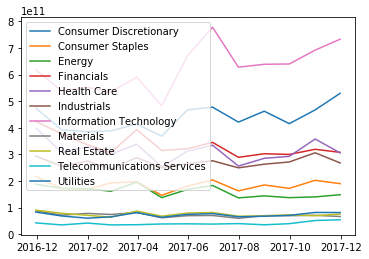

In [11]:
# Simple Plot

symbols = joined_stock_data_wide.index.tolist()

for s in symbols:
    dates = joined_stock_data_wide.loc[s].index
    values = joined_stock_data_wide.loc[s].values
    plt.plot(dates.tolist(), values.tolist())
plt.legend(symbols,loc='upper left')
plt.show()

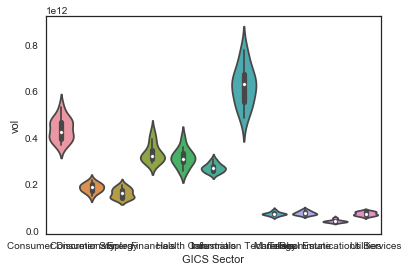

In [45]:
import seaborn as sns 
vp = sns.violinplot(x='GICS Sector',y='vol',data = joined_stock_data, scale='width', inner='box')

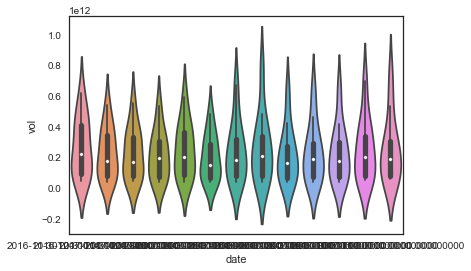

In [48]:
vp = sns.violinplot(x='date',y='vol',data = joined_stock_data,scale='count', inner='box')

In [22]:
# Owen - indeed data aggr by industry and month
no_industry_df = datafest[datafest.industry.isnull()]
no_cat_df = no_industry_df[no_industry_df.normTitleCategory.isnull()]

# Remove the rows with no cat from the df
cat_df = pd.concat([datafest, no_cat_df]).drop_duplicates(keep=False)

categories = {x for x in cat_df.normTitleCategory}

from datetime import datetime
no_dupe_df = cat_df.drop_duplicates('jobId')
no_dupe_df = no_dupe_df.assign(_date = no_dupe_df.date.apply(lambda x: datetime.strptime(x, '%Y-%m-%d')))
no_dupe_df = no_dupe_df.assign(month = no_dupe_df._date.apply(lambda x: x.month))
no_dupe_df = no_dupe_df.assign(year = no_dupe_df._date.apply(lambda x: x.year))
no_dupe_df = no_dupe_df.assign(month_year = no_dupe_df._date.apply(lambda x: x.month + 100*x.year))
us_df = no_dupe_df[no_dupe_df.country == 'US']

us_finance_df = us_df[us_df.normTitleCategory == 'finance']
us_finance_agg = us_finance_df.groupby([us_finance_df.year, us_finance_df.month])

us_salary = us_finance_agg['estimatedSalary'].agg('mean')
us_cnt = us_finance_agg['date'].count()
us_ratings = us_finance_agg['avgOverallRating'].agg('mean')

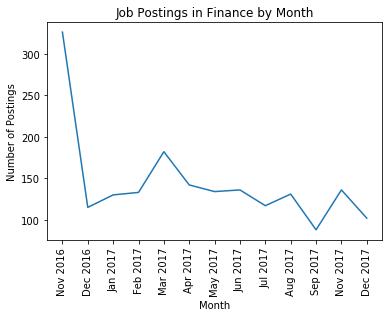

In [21]:
# plotting
plt.plot(range(13), list(us_cnt))
plt.title('Job Postings in Finance by Month')
plt.ylabel('Number of Postings')
plt.xlabel('Month')

month_dict = {
    0: 'Nov 2016',
    1: 'Dec 2016',
    2: 'Jan 2017',
    3: 'Feb 2017',
    4: 'Mar 2017',
    5: 'Apr 2017',
    6: 'May 2017',
    7: 'Jun 2017',
    8: 'Jul 2017',
    9: 'Aug 2017',
    10: 'Sep 2017',
    11: 'Nov 2017',
    12: 'Dec 2017'
}
xtick = [month_dict[x] for x in range(13)]
plt.xticks(range(13), xtick, rotation=90)
plt.show()

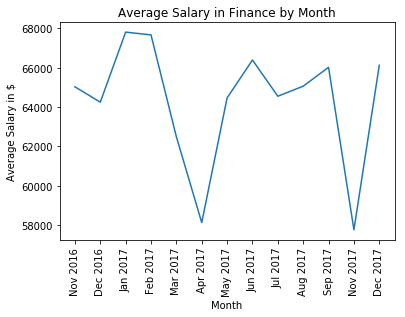

In [19]:
plt.plot(range(13), list(us_salary))
plt.title('Average Salary in Finance by Month')
plt.ylabel('Average Salary in $')
plt.xlabel('Month')
xtick = [month_dict[x] for x in range(13)]
plt.xticks(range(13), xtick, rotation=90)
plt.show()

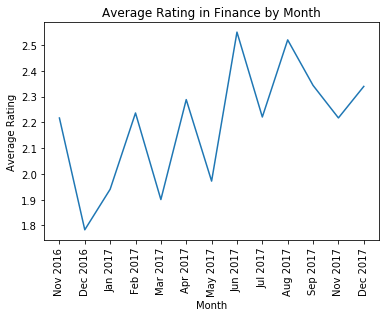

In [18]:
plt.plot(range(13), list(us_ratings))
plt.title('Average Rating in Finance by Month')
plt.ylabel('Average Rating')
plt.xlabel('Month')
xtick = [month_dict[x] for x in range(13)]
plt.xticks(range(13), xtick, rotation=90)
plt.show()